# Exploring COVID-19 in the News

Hanyong Xu

COVID-19 has impacted every fields in our life. By analyzing the news text with machine learning techniques, one can figure out the underlying trend in news as well as comparing the attitude and action done by different organizations.

Data source: [COVID-19 News Articles Open Research Dataset](https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26), which comes from CBC news's own search result regarding coronavirus.

In [116]:
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HanyongXu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HanyongXu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
news = pd.read_csv("cbc-news-coronavirus-articles-march-26/news.csv")
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,[],'More vital now:' Gay-straight alliances go vi...,2020-05-03 1:30,Lily Overacker and Laurell Pallot start each g...,Lily Overacker and Laurell Pallot start each g...,https://www.cbc.ca/news/canada/calgary/gay-str...
1,1,[],Scientists aim to 'see' invisible transmission...,2020-05-02 8:00,Some researchers aim to learn more about how t...,"This is an excerpt from Second Opinion, a week...",https://www.cbc.ca/news/technology/droplet-tra...
2,2,['The Canadian Press'],Coronavirus: What's happening in Canada and ar...,2020-05-02 11:28,Canada's chief public health officer struck an...,The latest: The lives behind the numbers: Wha...,https://www.cbc.ca/news/canada/coronavirus-cov...
3,3,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...
4,4,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...


In [83]:
stop_words=list(set(nltk.corpus.stopwords.words('english')))
ps = PorterStemmer()
lem = WordNetLemmatizer()
punctuation = list(string.punctuation)
ignore = stop_words+punctuation

## Exploratory Analysis 1: Word Frequency

In [93]:
def cleanwords(input_text):
    cleaned = []
    tokenized_w = word_tokenize(input_text) #tokenize
    for w in tokenized_w:
        if w not in ignore: #remove stop words
            cleaned.append(lem.lemmatize(w)) #lemmatize
    return cleaned

### Word Frequency for all texts

In [75]:
alltext = '. '.join(news.text)

In [80]:
len(alltext)

31173817

In [99]:
clean_text = cleanwords(alltext)

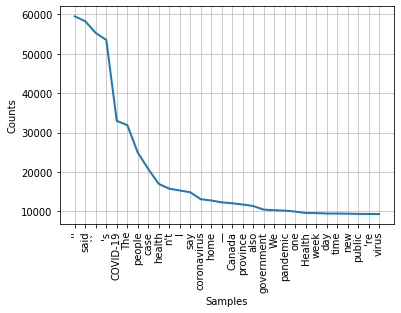

In [101]:
FreqDist(clean_text).plot(30,cumulative=False)
plt.show()

### Word Frequncy for all descriptions

In [90]:
alldes = '. '.join(str(v) for v in news.description)

In [91]:
len(alldes)

1242473

In [95]:
clean_des = cleanwords(alldes)

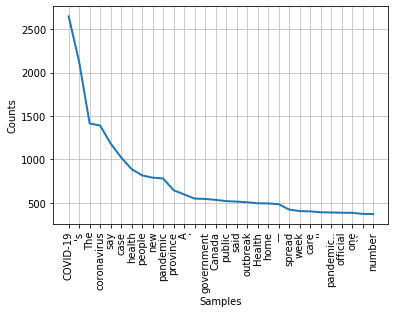

In [102]:
FreqDist(clean_des).plot(30,cumulative=False)
plt.show()

### Word Frequency for all titles

In [110]:
alltitle = '. '.join(news.title)

In [111]:
clean_title = cleanwords(alltitle)

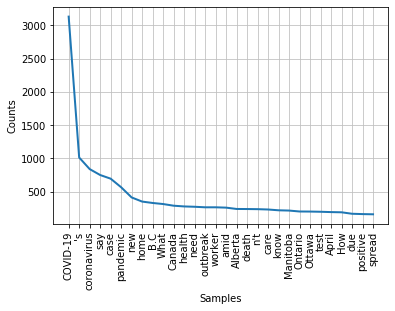

In [113]:
FreqDist(clean_title).plot(30,cumulative=False)
plt.show()

### Word Frequency by Month

In [132]:
news["datetime"] = pd.to_datetime(news.publish_date, errors='coerce', format='%Y-%m-%d %H:%M')

In [133]:
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url,datetime
0,0,[],'More vital now:' Gay-straight alliances go vi...,2020-05-03 1:30,Lily Overacker and Laurell Pallot start each g...,Lily Overacker and Laurell Pallot start each g...,https://www.cbc.ca/news/canada/calgary/gay-str...,2020-05-03 01:30:00
1,1,[],Scientists aim to 'see' invisible transmission...,2020-05-02 8:00,Some researchers aim to learn more about how t...,"This is an excerpt from Second Opinion, a week...",https://www.cbc.ca/news/technology/droplet-tra...,2020-05-02 08:00:00
2,2,['The Canadian Press'],Coronavirus: What's happening in Canada and ar...,2020-05-02 11:28,Canada's chief public health officer struck an...,The latest: The lives behind the numbers: Wha...,https://www.cbc.ca/news/canada/coronavirus-cov...,2020-05-02 11:28:00
3,3,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...,2020-05-02 18:45:00
4,4,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...,2020-05-02 18:45:00


In [354]:
news["week"] = news['datetime'].dt.strftime('%W')
news["month"] = news['datetime'].dt.strftime('%m')
news["day"] = news['datetime'].dt.strftime('%d')

In [323]:
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url,datetime,week,month
0,0,[],'More vital now:' Gay-straight alliances go vi...,2020-05-03 1:30,Lily Overacker and Laurell Pallot start each g...,Lily Overacker and Laurell Pallot start each g...,https://www.cbc.ca/news/canada/calgary/gay-str...,2020-05-03 01:30:00,17,05
1,1,[],Scientists aim to 'see' invisible transmission...,2020-05-02 8:00,Some researchers aim to learn more about how t...,"This is an excerpt from Second Opinion, a week...",https://www.cbc.ca/news/technology/droplet-tra...,2020-05-02 08:00:00,17,05
2,2,['The Canadian Press'],Coronavirus: What's happening in Canada and ar...,2020-05-02 11:28,Canada's chief public health officer struck an...,The latest: The lives behind the numbers: Wha...,https://www.cbc.ca/news/canada/coronavirus-cov...,2020-05-02 11:28:00,17,05
3,3,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...,2020-05-02 18:45:00,17,05
4,4,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...,2020-05-02 18:45:00,17,05


In [357]:
news_w = news.groupby(['week'])['title'].apply('. '.join).reset_index()
news_m = news.groupby(['month'])['title'].apply('. '.join).reset_index()
news_d = news.groupby(["month",'day'])['title'].apply('. '.join).reset_index()

In [149]:
news.groupby(['month']).size()

month
01     182
02     358
03    2402
04    3570
05     269
06       1
07       2
08       1
12       2
dtype: int64

In [159]:
news_m = news_m[:5]

In [156]:
clean_t_m = []
for index, row in news_m.iterrows():
    clean_t_m.append(cleanwords(row.title))

In [160]:
news_m["clean_t"] = clean_t_m

C:\Users\HanyongXu\Anaconda3\envs\musa-620\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
news_m

,month,title,clean_t
0,01,Canada won't follow U.S. and declare national ...,"[Canada, wo, n't, follow, U.S., declare, natio..."
1,02,What you need to know now about coronavirus: 2...,"[What, need, know, coronavirus, 2nd, evacuatio..."
2,03,Michigan hospitals jammed as coronavirus cases...,"[Michigan, hospital, jammed, coronavirus, case..."
3,04,Did the WHO mishandle the global coronavirus p...,"[Did, WHO, mishandle, global, coronavirus, pan..."
4,05,'More vital now:' Gay-straight alliances go vi...,"['More, vital, Gay-straight, alliance, go, vir..."


In [195]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools, collections

In [230]:
def count_word_frequencies(words, col, top):

    # Create counter
    counter = collections.Counter(words)
    
    return pd.DataFrame(counter.most_common(top),
                        columns=['words', col])

In [271]:
jan = count_word_frequencies(news_m.clean_t[0], "Jan", top=40)
feb = count_word_frequencies(news_m.clean_t[1], "Feb", top=40)
mar = count_word_frequencies(news_m.clean_t[2], "Mar", top=40)
apr = count_word_frequencies(news_m.clean_t[3], "Apr", top=40)

In [273]:
counts = jan.merge(feb, on="words", how="outer").merge(mar, on="words", how="outer").merge(apr, on="words", how="outer").fillna(0)

In [275]:
count_pivot = counts.melt(id_vars=['words'], 
        var_name='month', value_name='count')

In [277]:
count_pivot.head()

,words,month,count
0,coronavirus,Jan,125.0
1,China,Jan,48.0
2,say,Jan,35.0
3,case,Jan,34.0
4,outbreak,Jan,31.0


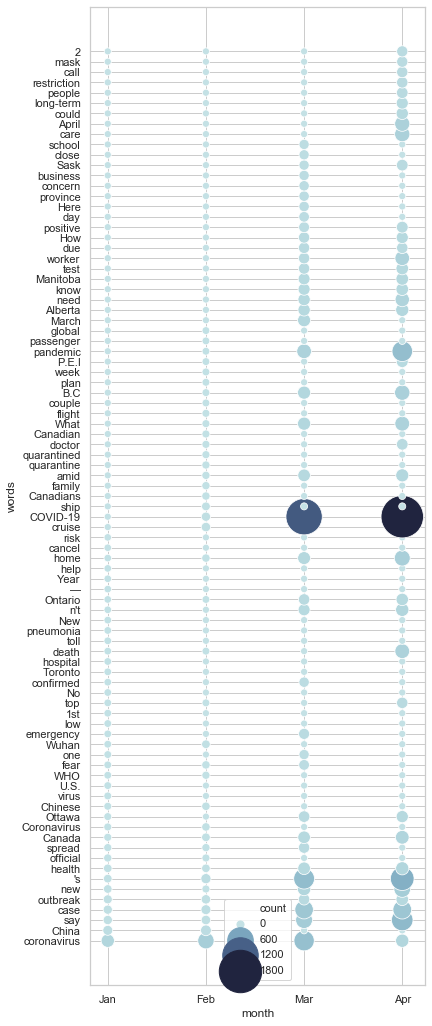

In [322]:
sns.set(rc={'figure.figsize':(6,18)})
sns.set_style("whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.scatterplot(x="month", y="words",
                     hue="count", size="count",
                     palette=cmap, sizes=(50, 1800),
                     data=count_pivot);

## Exploratory Analysis 2: Sentiment Analysis

In [325]:
import textblob

In [367]:
# subset the date out of range
news_d = news_d[:-6]

In [368]:
blobs = [textblob.TextBlob(t) for t in news_d.title]

In [369]:
blobs[0].sentiment

Sentiment(polarity=-0.1, subjectivity=0.6)

In [370]:
data = {}
#data['date'] = [t for t in news_d.month]
data['polarity'] = [b.sentiment.polarity for b in blobs]
data['subjectivity'] = [b.sentiment.subjectivity for b in blobs]
data['text'] = [t for t in news_d.title]
data = pd.DataFrame(data)

In [371]:
data

,polarity,subjectivity,text
0,-0.100000,0.600000,Previously unknown virus may be causing pneumo...
1,0.136364,0.454545,China reports 1st death from 'new type of coro...
2,0.000000,0.400000,China's mystery 'coronavirus' isn't currently ...
3,0.068182,0.252273,Woman with new coronavirus quarantined in Thai...
4,0.021645,0.532468,'Possible' there was limited human-to-human tr...
...,...,...,...
115,0.136364,0.454545,New coronavirus tested at Canada's national lab
116,0.000000,0.000000,WHO concerned coronavirus spreading person to ...
117,0.000000,0.000000,Saudi coronavirus work stymied at Canadian lab
118,0.000000,0.000000,WHO to help Saudi Arabia's coronavirus investi...


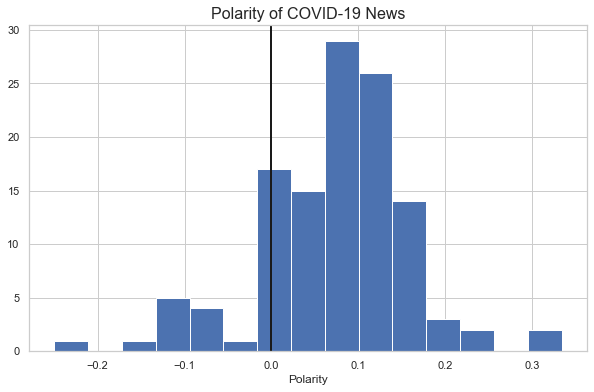

In [372]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# histogram
ax.hist(data['polarity'], bins='auto')
ax.axvline(x=0, c='k', lw=2)

# format
ax.set_xlabel("Polarity")
ax.set_title("Polarity of COVID-19 News", fontsize=16);

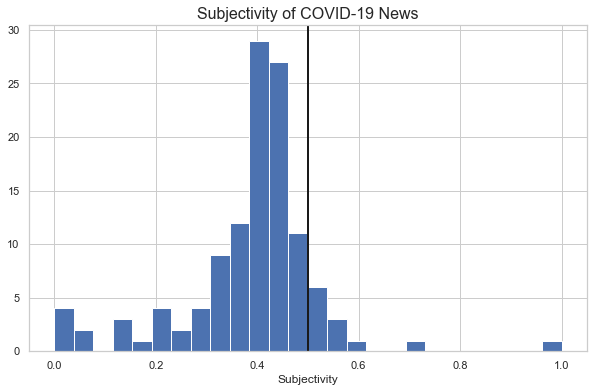

In [374]:
# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# histogram
ax.hist(data['subjectivity'], bins='auto')
ax.axvline(x=0.5, c='k', lw=2)

# format
ax.set_xlabel("Subjectivity")
ax.set_title("Subjectivity of COVID-19 News", fontsize=16);

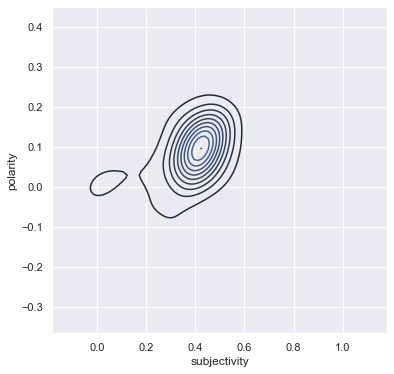

In [376]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.kdeplot(data=data['subjectivity'], data2=data['polarity'])